<div><font face="Times New Roman" size=7><br><br>
<center>
Spectral Clustering
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Alireza Gargoori for any questions you have or other inconveniences.*  <br>
*Telegram ID: @alregamo*  <br>
*Email: alireza.agm@gmail.com* <br>

<font face="Arial" size=4><br>
    
One type of common methods for clustering are the <b>Spectral Clustering</b> methods, which we would learn in this execise.
<br><br>
Spectral Clustering is a type of clustering algorithm in machine learning that <b>uses eigenvectors of a similarity matrix</b> to divide a set of data points into clusters. The basic idea behind spectral clustering is to use the eigenvectors of the Laplacian matrix of a graph to represent the data points and find clusters by applying k-means or another clustering algorithm to the eigenvectors. <br><br>
    
<div> <br>
<center>
<img src="https://images.squarespace-cdn.com/content/v1/5d782753c70af105c29a9b14/1608653466446-YC3DJUQR7FDU35XM90AE/shutterstock_1410280415.jpg?format=1000w" width="700">
</center>
</div><br>
      
Consider the matrix <b>$W$</b> representing the similarity of data points, where $(i,j)$ entry is non-zero if samples $(x^{(i)}, x^{(j)})$ are in the mutual KNN (k-nearest neighbors) of each other.<br><br>
    $$W_{ij} = \begin{cases}
    1, & x^{(i)} \in KNN \{x^{(j)}\} \hspace{3mm} AND \hspace{3mm} x^{(j)} \in KNN \{x^{(i)}\} \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Another method to define <b>$W$</b> is to use a fully connected graph, where the value of its entries are obtained from a function which measures the similarity of these samples.<br><br>
    $$W_{ij} =  k(x^{(i)}, x^{(j)})$$ <br><br>
    where $k(x^{(i)}, x^{(j)})$ is a function to measure the similarity of two samples. An example of this function could be the <b>Radial Basis Function (RBF)</b>, defined as:
    $$k(x^{(i)}, x^{(j)}) = exp(-\gamma \lVert x^{(i)} - x^{(j)} \rVert)$$
   <br> We call matrix <b>$W$</b> the adjacency matrix. (There are other types of definitions for this matrix, like the $\epsilon$-neighborhood graph, simple KNN graph, etc.) <br><br>
    The degree of each vertex in the graph is defined as $g_i = \sum_{j}^{} w_{ij}$.
    Also, consider the diagonal matrix <b>$G$</b>, defined as: <br><br>
    $$G_{ij} = \begin{cases}
    g_i, & i=j \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Now we are ready to define the <b>Laplacian</b> matrix <b>$L$</b>:
    $$L = G - W $$<br><br><br>
    It can be shown the eigenvectors of <b>$L$</b> corresponding to the 𝑚 smallest eigenvalues are appropriate for clustering. In other words, we first compute the 𝑚 smallest eigenvalues $\lambda_i$ and their corresponding eigenvectors $\phi_i$. Let $\Phi \in \mathbb{R} ^{p\times m}$ be a matrix consisting of $\{\phi_i\}_{i=1}^{m}$, i.e. the first(smallest)  eigenvectors of <b>$L$</b>:<br><br>
    $$\Phi(x^{(i)}) = [\phi_1(x^{(i)}), \phi_2(x^{(i)}), ..., \phi_m(x^{(i)})]^T \in \mathbb{R}^m$$ <br>
    In other words, we transform the original data $x^{(i)}$ from $\mathbb{R}^{p}$ to $\mathbb{R}^{m}$ through the first m eigenvectors of <b>$L$</b>: it is a nonlinear transformation. The $\it{i}$th row of $\Phi$ represents the $\it{i}$th data point in the new feature space. This step is also called Laplacian eigenmap, which is the key step in spectral clustering.
    <br><br> Now, in the final step, we need to apply K-means clustering to the rows of $\Phi$ to group the data into m clusters.

<font face="Arial" size=4>
<br>In summary, the procedure consists of 4 steps: <br><br>
    <b>1.</b> Constuct the adjacency matrix <b>$W$</b>. <br> <br>
    <b>2.</b> Find the corresponding laplacian matrix <b>$L$</b>. <br><br>
    <b>3.</b> Find the m smallest eigenvalues and their corresponding eigenvectors $\{\phi_i\}_{i=1}^{m}$. Transform the samples in the original feature space into the new one, using the matrix $\Phi$. <br><br>
    <b>4.</b> Apply K-Means in this new feature space. <br><br>

## Part (A) (Bonus)
<font face="Arial" size=4>
<br>Prove that Laplacian Matrix is positive semi-definite. (Therefore, all the eigenvalues of <b>$L$</b> are $\geq 0$)

The Laplacian matrix can be written as L = B^T B, where B is the edge-vertex incidence matrix of the graph.

(B^T B)_ij = sum_k B_ik * B_jk

where the sum is over all edges k incident to both vertices i and j. Note that for each such edge k, exactly two nonzero terms appear in the sum, corresponding to the ith and jth rows of B. Moreover, these terms have opposite signs, since the ith row of B has a 1 in the kth column while the jth row has a -1.

Therefore, the sum reduces to:

(B^T B)_ij = sum_k (B_ik)^2 + (B_jk)^2 = degree(i) if i = j, -1 if i and j are adjacent, 0 otherwise

which is exactly the definition of the Laplacian matrix.
<div style="color:green">***************************************************************************************************************************************************************************************************</div>
we need to show that for any vector x, x^T L x is non-negative. That is,

x^T L x >= 0


As mentioned before, L = B^T B

So:

x^T L x = x^T B^T B x = ||B x||^2

Since the norm squared is always non-negative, we have:

x^T L x = ||B x||^2 >= 0

## Part (B)
<font face="Arial" size=4> <br>
We stated that the transformation must be done using the eigenvectos corresponding to the smallest eigenvalues of laplacian matrix. This can be proved mathematically; however, we want to illustrate it with a simple example. <br>

It can be shown that as the eigenvalues of the laplacian matrix gets closer to zero, the graph is more disconnected! <br>
Explain the above statement in the following gif. In other words, explain the effect of adding edges to the graph on the eigenvalues of the laplacian matrix:
<div> <br>
<center>
<img src="spectral.gif" width="700">
</center>
</div><br>

If the eigenvalues of the Laplacian matrix are small, this means that the difference between adjacent eigenvalues is also small. This indicates that there is little variation in the connectivity of the graph across different parts of the graph. In other words, the graph may have several small connected components that are not well-connected to each other.
    
<div
     style="color:green">In the context of the Laplacian matrix, small eigenvalues indicate that there are sets of vertices that are only weakly connected to the rest of the graph.</div>


<font face="Arial" size=4>
Why do you think the second eigenvalue is close to zero in the following graph?
<div> <br>
<center>
<img src="spectral_final.png" width="700">
</center>
</div><br>

Small non-zero eigenvalues indicate the presence of bridges or weak connections between different parts of the graph.

<div
     style="color:green">The second eigenvalue is close to zero because the left part of the graph is poorly connected to the right part (with only a single edge).

## Part (C)
<font face="Arial" size=4> <br>
Here we want to compare the results of spectral clustering to the typical K-Means clustering. Consider the following dataset:

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
import warnings
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

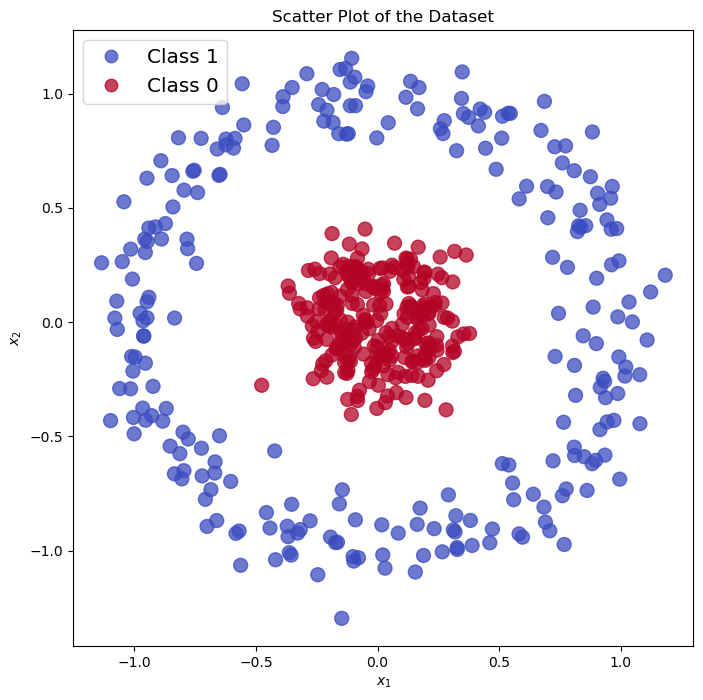

In [2]:
X, labels = make_circles(500, factor=0.2, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")

plt.show()

<font face="Arial" size=4>
Assume that the true labels are unknown, and we need to cluster the samples into two clusters. Apply K-Means algorithm with $K=2$ on the samples and plot the resulting clusters. <br> What do you think about the clusters from K-Means? Do the results match with the true labels?

/Users/danialahangarani/tensorflow-env/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


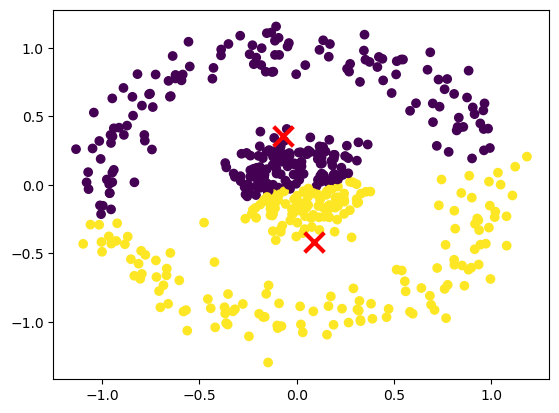

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', c= 'r', s=200, linewidths=3)
plt.show()

warnings.filterwarnings("ignore")

It is evident that KMeans performs poorly on this dataset, as it incorrectly clusters the data points.

The ideal clustering for this dataset would have one cluster for the inside data points and another for the outside data points. However, as shown in the plot, KMeans provides incorrect labels and the center of the final cluster is also wrong.

<font face="Arial" size=4> <br>
Now apply spectral clustering method on this dataset. You can use <code>sklearn.cluster.SpectralClustering</code> in this part. Also, use the KNN adjacency matrix for <b>$W$</b>.

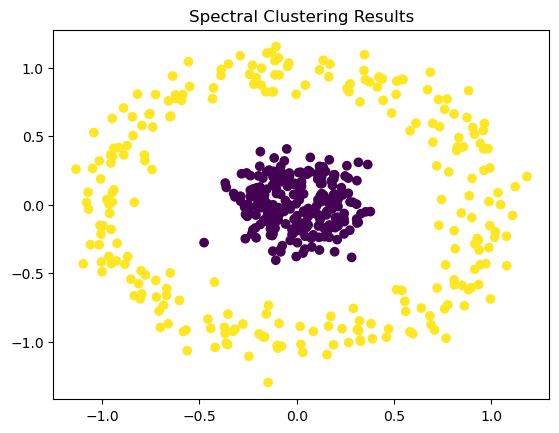

In [4]:
k = 10  
W = kneighbors_graph(X, k, mode='connectivity')

sc = SpectralClustering(n_clusters=2, affinity='precomputed')
y_sc = sc.fit_predict(W)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_sc)
plt.title('Spectral Clustering Results')

plt.show()

<font face="Arial" size=4> <br>
Change the adjacency matrix as the fully connected graph with rbf as the similarity measurement function. (Note that you can set this through the <code>affinity</code> parameter of the spectral clustering model.)

#### We can do this in 2 ways:

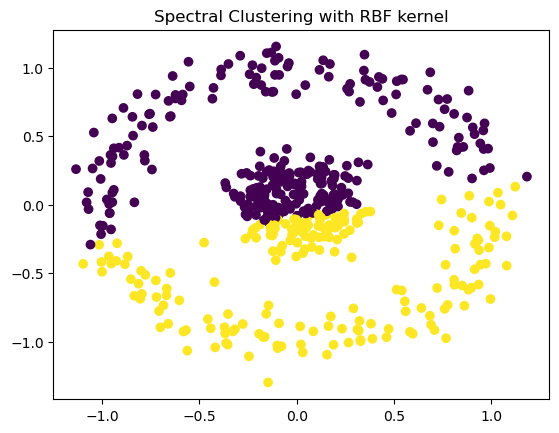

In [5]:
W = rbf_kernel(X, gamma=1.)

spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed')
spectral_clustering.fit(W)

plt.scatter(X[:, 0], X[:, 1], c=spectral_clustering.labels_, cmap='viridis')
plt.title('Spectral Clustering with RBF kernel')

plt.show()

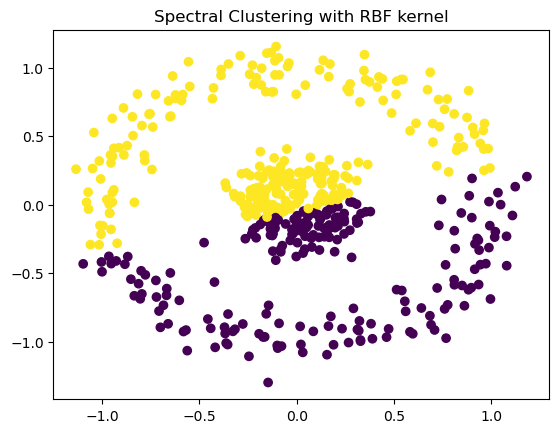

In [4]:
spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', gamma=.1)
spectral_clustering.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=spectral_clustering.labels_, cmap='viridis')
plt.title('Spectral Clustering with RBF kernel')

plt.show()

<font face="Arial" size=4> <br>

Compare the results of K-Means model vs. Spectral Clustering methods. Also, mention the effect of <code>rbf</code> adjacency matrix on the result of spectral clustering model.

The K-means algorithm can be fast and efficient for large datasets, but it assumes that the data points are spherical and equally sized, and it can struggle with non-linear or complex data distributions.

Spectral Clustering is particularly good at identifying non-linear patterns in data and can handle complex structures. RBF kernel creates a dense and symmetric graph which reflects the strength of connections between nodes in the graph. This type of graph can capture more complex relationships between data points, resulting in improved clustering performance.



<div style="color:green">I think we did not get good results with KMeans due to the complex data distribution. Spectral Clustering with RBF failed to cluster well because it creates a dense and fully connected adjacency matrix, whereas this dataset has two separate clusters. However, in my opinion, Spectral Clustering with a binary adjacency (KNN) matrix performed well as it effectively separated the two clusters using its own binary identity.</div>

# Part (D)

<font face="Arial" size=4><br>
Explain the pros and cons of spectral clustering methods. (Feel free to search more about its advantages and disadvantages through internet, but mention your sources.)

Pros:

One of the main advantages that spectral clustering has over other clustering algorithms is that it can be used on high-dimensional datasets with many features. This is a relatively rare quality that applies primarily to graph-based clustering methods like spectral clustering.

Spectral clustering does not make strong assumptions about the shape of the clusters in the data. That means that it is appropriate to use spectral clustering even when you suspect the clusters in your data may be irregularly shaped.

Some implementations of spectral clustering can handle cases where you have mixed data types, such as cases where you have categorical variables in your data. This is in part because spectral clustering uses similarity metrics rather than distance metrics to determine which points have more in common.


Cons:

One disadvantage of spectral clustering is that it is relatively slow compared to other clustering algorithms like k-means clustering. If you have a dataset with many, many data points then you may be better off using a faster algorithm.

Traditional spectral clustering algorithms include a step where the k-means algorithm is applied. That means that like k-means clustering, spectral clustering is sensitive to the choice of seed and initialization conditions that are used. The clustering results may change when the algorithm is run multiple times.

As with many other clustering algorithms, spectral clustering requires you to select the number of clusters that should be used for your dataset. This can be difficult to do if you do not have strong intuition about the true number of clusters in the data.

The choice of parameters in spectral clustering, such as the similarity measure used and the type of kernel function, can have a significant impact on the results obtained. Tuning these parameters can be challenging and time-consuming.


Source: https://crunchingthedata.com/when-to-use-spectral-clustering/

# Part (E): Clustering on Cancer Gene Expression RNA-seq dataset

### Part (E.1): Clustering
<font face="Arial" size=4><br>
This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set. It is a random extraction of gene expressions of patients having different types of tumor: 
    
BRCA (breast invasive carcinoma) <br>
KIRC (kidney renal clear cell carcinoma) <br>
COAD (colon adenocarcinoma) <br>
LUAD (lung adenocarcinoma) <br>
PRAD (prostate adenocarcinoma) <br> <br>
    
    
There are 801 instances with 20531 attributes, which are the gene expressions among different patients with each of this tumors. The data can be downloaded here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

<font face="Arial" size=4>
Assume that the true labels are unknown and we cannot use classification methods to distinguish cancer types. Use Spectral Clustering method and try to cluster the data as best as you can. You are allowed to use <code>sklearn.cluster.SpectralClustering</code> for this purpose. The choice of hyperparameters are on your own.

In [6]:
df = pd.read_csv('data/data.csv')
X_SP = df.iloc[:, 1:].values

model = SpectralClustering(n_clusters=5, eigen_solver='arpack', affinity='nearest_neighbors', n_neighbors=10)
pred_labels = model.fit_predict(X_SP)

### Part (E.2): Evaluation of Clustering Algorithm

<font face="Arial" size=4><br>
Search about the metrics that we can use for clustering purposes, given that we have the true labels of the data and we want to assess the performance of our clustering method. Give a short explanation about the <code>adjusted rand index(ARI)</code> and <code>normalized mutual information(NMI)</code> metrics and evaluate your model with these metrics. You are allowed to use <code>sklearn.metrics</code> in this part.

The Adjusted Rand Index (ARI) is a measure of the similarity between two clusterings. It considers all pairs of samples and counts the number of pairs that are assigned to the same or different clusters in both the predicted and true labelings. The ARI score ranges from -1 to 1, where a score of 1 indicates perfect agreement between the predicted and true labelings, 0 indicates random labeling, and -1 indicates complete disagreement.

The Normalized Mutual Information (NMI) measures the mutual information between the predicted and true labelings of a dataset, normalized by the average entropy of the two labelings. The NMI score ranges from 0 to 1, where a score of 1 indicates perfect agreement between the predicted and true labelings, and 0 indicates the absence of mutual information between the two labelings.

In [7]:
df1 = pd.read_csv('data/labels.csv')
df2 = pd.read_csv('data/data.csv')
merged_df = pd.concat([df1, df2], axis=1)
merged_df = merged_df.drop(merged_df.columns[0], axis=1)

le = LabelEncoder()
merged_df['Class'] = le.fit_transform(merged_df['Class'])
X = merged_df.drop('Class', axis=1).values
true_labels = merged_df['Class'].values

ari = adjusted_rand_score(true_labels, pred_labels)
nmi = normalized_mutual_info_score(true_labels, pred_labels)

print("Adjusted Rand Index: {:.2f}".format(ari))
print("Normalized Mutual Information: {:.2f}".format(nmi))

Adjusted Rand Index: 1.00
Normalized Mutual Information: 0.99


### Part (E.3): Visualization

<font face="Arial" size=4><br>
Visualize the ground truth labels and the predictions of your model in 2 figures. You can use <code>PCA</code> for dimensionality reduction before visualization. Also, you can use <code>t-SNE</code> from <code>sklearn.manifold.TSNE</code> instead. Other methods such as <code>UMAP</code> are accepted as well.

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_SP = PCA(n_components=2)
X_pca_SP = pca_SP.fit_transform(X_SP)

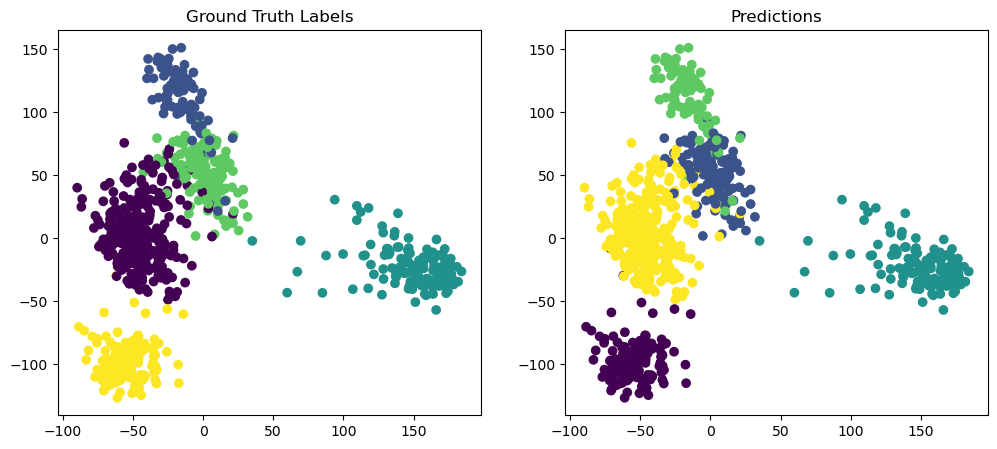

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels)
axs[0].set_title("Ground Truth Labels")

axs[1].scatter(X_pca_SP[:, 0], X_pca_SP[:, 1], c=pred_labels)
axs[1].set_title("Predictions")

plt.show()